In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

In [ ]:
!pip install --upgrade albumentations

In [ ]:
!pip install torchsummary
!pip install tqdm
!pip install seaborn

In [ ]:
%cd /content/drive/MyDrive/EVA7/S7

/content/drive/MyDrive/EVA7/S7


## Importing the python Modules

In [ ]:
import torch
from torchsummary import summary
from torch.utils.data import Dataset, DataLoader
import torch.optim as optim

import torchvision
from torchvision import datasets, transforms
from tqdm import tqdm

from model import model
from utils.test import test
from utils.train import train
from utils.plot_images import *
from utils.fitmodel import fit_model


from utils.AlbumentationImageDataset import AlbumentationImageDataset

import matplotlib.pyplot as plt
import numpy as np




## Loading the dataset

In [ ]:
# loading the dataset
cifar_10_database = datasets.CIFAR10('./data', train=True, download=True)
cifar_10_data = cifar_10_database.data

# Calculate the mean and std for normalization
print('[Train]')
print(' - Shape:', cifar_10_data.shape)
print(' - mean:', np.mean(cifar_10_data, axis=(0,1,2)) / 255.)
print(' - std:', np.std(cifar_10_data, axis=(0,1,2)) / 255.)

train_mean  = list(np.mean(cifar_10_data, axis=(0,1,2)) / 255.)
train_std = list(np.std(cifar_10_data, axis=(0,1,2)) / 255.)


1.8%IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)

5.6%IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)

10.8%IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)

14.9%IOPub m

Extracting ./data/cifar-10-python.tar.gz to ./data
[Train]
 - Shape: (50000, 32, 32, 3)
 - mean: [0.49139968 0.48215841 0.44653091]
 - std: [0.24703223 0.24348513 0.26158784]


## Plotting few images in dataset


In [ ]:
def plot_data(data = None,cols=8, rows=4):
  figure = plt.figure(figsize=(14, 10))
  for i in range(1, cols * rows + 1):
    img, label = data[i]

    figure.add_subplot(rows, cols, i)
    plt.title(data.classes[label])
    plt.axis("off")
    plt.imshow(img, cmap="gray")

  plt.tight_layout()
  plt.show()

In [ ]:
#plot_data(cifar_10_database)

## Run in CUDA


In [ ]:
SEED = 1

# CUDA?
cuda = torch.cuda.is_available()
print("CUDA Available:", cuda)

# For reproducibility
torch.manual_seed(SEED)

if cuda:
    torch.cuda.manual_seed(SEED)
    BATCH_SIZE=256
else:
    BATCH_SIZE=256

CUDA Available: True


## Data Agumentation using albumentations

In [ ]:
trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True )
testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True)


train_loader = DataLoader(AlbumentationImageDataset(trainset, train=True), batch_size=BATCH_SIZE,
                                          shuffle=True, num_workers=2)
test_loader = DataLoader(AlbumentationImageDataset(testset, train=False), batch_size=BATCH_SIZE,
                                          shuffle=False, num_workers=1)

Files already downloaded and verified
Files already downloaded and verified


## Running Model


In [ ]:
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
print(device)
net = model.Net(dropout=0.025).to(device)
summary(net, input_size=(3, 32, 32))

cuda
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 32, 32, 32]             864
       BatchNorm2d-2           [-1, 32, 32, 32]              64
              ReLU-3           [-1, 32, 32, 32]               0
           Dropout-4           [-1, 32, 32, 32]               0
            Conv2d-5           [-1, 32, 32, 32]           9,216
       BatchNorm2d-6           [-1, 32, 32, 32]              64
              ReLU-7           [-1, 32, 32, 32]               0
           Dropout-8           [-1, 32, 32, 32]               0
            Conv2d-9           [-1, 32, 16, 16]           9,216
      BatchNorm2d-10           [-1, 32, 16, 16]              64
             ReLU-11           [-1, 32, 16, 16]               0
          Dropout-12           [-1, 32, 16, 16]               0
           Conv2d-13           [-1, 64, 16, 16]          18,432
      BatchNorm2d-14           [-1

## Training

In [ ]:
training_output_data = fit_model(net,hardware=device, epochs=80,train_loader=train_loader, test_loader=test_loader)

epoch: 1


Batch_id=195 Loss=0.70129 Accuracy=75.30: 100%|████████████████████████████████████████████████| 196/196 [00:04<00:00, 42.37it/s]



Test set: Average loss: 0.4484, Accuracy: 8442/10000 (84.42%)

epoch: 2


Batch_id=195 Loss=0.69967 Accuracy=75.51: 100%|████████████████████████████████████████████████| 196/196 [00:04<00:00, 42.65it/s]



Test set: Average loss: 0.4534, Accuracy: 8427/10000 (84.27%)

epoch: 3


Batch_id=195 Loss=0.70416 Accuracy=75.35: 100%|████████████████████████████████████████████████| 196/196 [00:04<00:00, 42.98it/s]



Test set: Average loss: 0.4506, Accuracy: 8435/10000 (84.35%)

epoch: 4


Batch_id=195 Loss=0.71344 Accuracy=75.04: 100%|████████████████████████████████████████████████| 196/196 [00:04<00:00, 43.21it/s]



Test set: Average loss: 0.4667, Accuracy: 8404/10000 (84.04%)

epoch: 5


Batch_id=195 Loss=0.71510 Accuracy=74.93: 100%|████████████████████████████████████████████████| 196/196 [00:04<00:00, 43.93it/s]



Test set: Average loss: 0.4722, Accuracy: 8383/10000 (83.83%)

epoch: 6


Batch_id=195 Loss=0.71839 Accuracy=74.94: 100%|████████████████████████████████████████████████| 196/196 [00:04<00:00, 43.75it/s]



Test set: Average loss: 0.4641, Accuracy: 8398/10000 (83.98%)

epoch: 7


Batch_id=195 Loss=0.72170 Accuracy=74.55: 100%|████████████████████████████████████████████████| 196/196 [00:04<00:00, 44.21it/s]



Test set: Average loss: 0.4856, Accuracy: 8329/10000 (83.29%)

epoch: 8


Batch_id=195 Loss=0.73369 Accuracy=74.35: 100%|████████████████████████████████████████████████| 196/196 [00:04<00:00, 43.73it/s]



Test set: Average loss: 0.4906, Accuracy: 8314/10000 (83.14%)

epoch: 9


Batch_id=195 Loss=0.73073 Accuracy=74.49: 100%|████████████████████████████████████████████████| 196/196 [00:04<00:00, 42.88it/s]



Test set: Average loss: 0.4775, Accuracy: 8356/10000 (83.56%)

epoch: 10


Batch_id=195 Loss=0.73386 Accuracy=74.22: 100%|████████████████████████████████████████████████| 196/196 [00:04<00:00, 43.82it/s]



Test set: Average loss: 0.4992, Accuracy: 8256/10000 (82.56%)

epoch: 11


Batch_id=195 Loss=0.74234 Accuracy=74.02: 100%|████████████████████████████████████████████████| 196/196 [00:04<00:00, 43.36it/s]



Test set: Average loss: 0.4994, Accuracy: 8323/10000 (83.23%)

epoch: 12


Batch_id=195 Loss=0.73894 Accuracy=74.19: 100%|████████████████████████████████████████████████| 196/196 [00:04<00:00, 43.59it/s]



Test set: Average loss: 0.4987, Accuracy: 8298/10000 (82.98%)

epoch: 13


Batch_id=195 Loss=0.73918 Accuracy=73.92: 100%|████████████████████████████████████████████████| 196/196 [00:04<00:00, 43.31it/s]



Test set: Average loss: 0.5025, Accuracy: 8303/10000 (83.03%)

epoch: 14


Batch_id=195 Loss=0.74164 Accuracy=73.95: 100%|████████████████████████████████████████████████| 196/196 [00:04<00:00, 43.30it/s]



Test set: Average loss: 0.4998, Accuracy: 8295/10000 (82.95%)

epoch: 15


Batch_id=195 Loss=0.73669 Accuracy=74.18: 100%|████████████████████████████████████████████████| 196/196 [00:04<00:00, 43.62it/s]



Test set: Average loss: 0.5579, Accuracy: 8133/10000 (81.33%)

epoch: 16


Batch_id=195 Loss=0.75308 Accuracy=73.58: 100%|████████████████████████████████████████████████| 196/196 [00:04<00:00, 43.63it/s]



Test set: Average loss: 0.5051, Accuracy: 8284/10000 (82.84%)

epoch: 17


Batch_id=195 Loss=0.75125 Accuracy=73.75: 100%|████████████████████████████████████████████████| 196/196 [00:04<00:00, 43.18it/s]



Test set: Average loss: 0.4992, Accuracy: 8241/10000 (82.41%)

epoch: 18


Batch_id=195 Loss=0.73833 Accuracy=74.18: 100%|████████████████████████████████████████████████| 196/196 [00:04<00:00, 42.63it/s]



Test set: Average loss: 0.5280, Accuracy: 8191/10000 (81.91%)

epoch: 19


Batch_id=195 Loss=0.73659 Accuracy=74.05: 100%|████████████████████████████████████████████████| 196/196 [00:04<00:00, 41.81it/s]



Test set: Average loss: 0.4936, Accuracy: 8270/10000 (82.70%)

epoch: 20


Batch_id=195 Loss=0.73776 Accuracy=74.07: 100%|████████████████████████████████████████████████| 196/196 [00:04<00:00, 43.34it/s]



Test set: Average loss: 0.4813, Accuracy: 8350/10000 (83.50%)

epoch: 21


Batch_id=195 Loss=0.73544 Accuracy=74.20: 100%|████████████████████████████████████████████████| 196/196 [00:04<00:00, 43.70it/s]



Test set: Average loss: 0.4853, Accuracy: 8334/10000 (83.34%)

epoch: 22


Batch_id=195 Loss=0.73774 Accuracy=74.22: 100%|████████████████████████████████████████████████| 196/196 [00:04<00:00, 43.74it/s]



Test set: Average loss: 0.5016, Accuracy: 8284/10000 (82.84%)

epoch: 23


Batch_id=195 Loss=0.73258 Accuracy=74.27: 100%|████████████████████████████████████████████████| 196/196 [00:04<00:00, 43.44it/s]



Test set: Average loss: 0.4905, Accuracy: 8310/10000 (83.10%)

epoch: 24


Batch_id=195 Loss=0.73532 Accuracy=74.26: 100%|████████████████████████████████████████████████| 196/196 [00:04<00:00, 44.26it/s]



Test set: Average loss: 0.4789, Accuracy: 8315/10000 (83.15%)

epoch: 25


Batch_id=195 Loss=0.72468 Accuracy=74.52: 100%|████████████████████████████████████████████████| 196/196 [00:04<00:00, 43.40it/s]



Test set: Average loss: 0.4908, Accuracy: 8340/10000 (83.40%)

epoch: 26


Batch_id=195 Loss=0.71717 Accuracy=75.08: 100%|████████████████████████████████████████████████| 196/196 [00:04<00:00, 44.28it/s]



Test set: Average loss: 0.5061, Accuracy: 8284/10000 (82.84%)

epoch: 27


Batch_id=195 Loss=0.72306 Accuracy=74.52: 100%|████████████████████████████████████████████████| 196/196 [00:04<00:00, 43.61it/s]



Test set: Average loss: 0.4724, Accuracy: 8378/10000 (83.78%)

epoch: 28


Batch_id=195 Loss=0.71937 Accuracy=74.78: 100%|████████████████████████████████████████████████| 196/196 [00:04<00:00, 43.24it/s]



Test set: Average loss: 0.5084, Accuracy: 8287/10000 (82.87%)

epoch: 29


Batch_id=195 Loss=0.71261 Accuracy=75.00: 100%|████████████████████████████████████████████████| 196/196 [00:04<00:00, 43.00it/s]



Test set: Average loss: 0.4762, Accuracy: 8331/10000 (83.31%)

epoch: 30


Batch_id=195 Loss=0.71218 Accuracy=75.02: 100%|████████████████████████████████████████████████| 196/196 [00:04<00:00, 43.64it/s]



Test set: Average loss: 0.4808, Accuracy: 8358/10000 (83.58%)

epoch: 31


Batch_id=195 Loss=0.71072 Accuracy=75.04: 100%|████████████████████████████████████████████████| 196/196 [00:04<00:00, 44.37it/s]



Test set: Average loss: 0.4681, Accuracy: 8408/10000 (84.08%)

epoch: 32


Batch_id=195 Loss=0.70422 Accuracy=75.35: 100%|████████████████████████████████████████████████| 196/196 [00:04<00:00, 43.51it/s]



Test set: Average loss: 0.4933, Accuracy: 8296/10000 (82.96%)

epoch: 33


Batch_id=195 Loss=0.70293 Accuracy=75.40: 100%|████████████████████████████████████████████████| 196/196 [00:04<00:00, 43.37it/s]



Test set: Average loss: 0.4615, Accuracy: 8388/10000 (83.88%)

epoch: 34


Batch_id=195 Loss=0.70113 Accuracy=75.41: 100%|████████████████████████████████████████████████| 196/196 [00:04<00:00, 43.21it/s]



Test set: Average loss: 0.4887, Accuracy: 8341/10000 (83.41%)

epoch: 35


Batch_id=195 Loss=0.70233 Accuracy=75.41: 100%|████████████████████████████████████████████████| 196/196 [00:04<00:00, 43.68it/s]



Test set: Average loss: 0.4641, Accuracy: 8392/10000 (83.92%)

epoch: 36


Batch_id=195 Loss=0.69311 Accuracy=75.68: 100%|████████████████████████████████████████████████| 196/196 [00:04<00:00, 43.86it/s]



Test set: Average loss: 0.4672, Accuracy: 8359/10000 (83.59%)

epoch: 37


Batch_id=195 Loss=0.69348 Accuracy=75.63: 100%|████████████████████████████████████████████████| 196/196 [00:04<00:00, 43.47it/s]



Test set: Average loss: 0.4644, Accuracy: 8421/10000 (84.21%)

epoch: 38


Batch_id=195 Loss=0.69802 Accuracy=75.46: 100%|████████████████████████████████████████████████| 196/196 [00:04<00:00, 43.24it/s]



Test set: Average loss: 0.4496, Accuracy: 8466/10000 (84.66%)

epoch: 39


Batch_id=195 Loss=0.69247 Accuracy=75.68: 100%|████████████████████████████████████████████████| 196/196 [00:04<00:00, 43.56it/s]



Test set: Average loss: 0.4552, Accuracy: 8461/10000 (84.61%)

epoch: 40


Batch_id=195 Loss=0.67849 Accuracy=76.11: 100%|████████████████████████████████████████████████| 196/196 [00:04<00:00, 43.35it/s]



Test set: Average loss: 0.4873, Accuracy: 8347/10000 (83.47%)

epoch: 41


Batch_id=195 Loss=0.67898 Accuracy=76.09: 100%|████████████████████████████████████████████████| 196/196 [00:04<00:00, 42.53it/s]



Test set: Average loss: 0.4774, Accuracy: 8396/10000 (83.96%)

epoch: 42


Batch_id=195 Loss=0.68451 Accuracy=76.04: 100%|████████████████████████████████████████████████| 196/196 [00:04<00:00, 42.54it/s]



Test set: Average loss: 0.4573, Accuracy: 8424/10000 (84.24%)

epoch: 43


Batch_id=195 Loss=0.68369 Accuracy=75.88: 100%|████████████████████████████████████████████████| 196/196 [00:04<00:00, 42.82it/s]



Test set: Average loss: 0.4398, Accuracy: 8498/10000 (84.98%)

epoch: 44


Batch_id=195 Loss=0.68213 Accuracy=76.08: 100%|████████████████████████████████████████████████| 196/196 [00:04<00:00, 43.16it/s]



Test set: Average loss: 0.4620, Accuracy: 8401/10000 (84.01%)

epoch: 45


Batch_id=195 Loss=0.66841 Accuracy=76.75: 100%|████████████████████████████████████████████████| 196/196 [00:04<00:00, 43.34it/s]



Test set: Average loss: 0.4586, Accuracy: 8427/10000 (84.27%)

epoch: 46


Batch_id=195 Loss=0.67347 Accuracy=76.60: 100%|████████████████████████████████████████████████| 196/196 [00:04<00:00, 43.52it/s]



Test set: Average loss: 0.4404, Accuracy: 8512/10000 (85.12%)

epoch: 47


Batch_id=195 Loss=0.66551 Accuracy=76.68: 100%|████████████████████████████████████████████████| 196/196 [00:04<00:00, 43.59it/s]



Test set: Average loss: 0.4205, Accuracy: 8540/10000 (85.40%)

epoch: 48


Batch_id=195 Loss=0.66296 Accuracy=76.81: 100%|████████████████████████████████████████████████| 196/196 [00:04<00:00, 42.18it/s]



Test set: Average loss: 0.4350, Accuracy: 8494/10000 (84.94%)

epoch: 49


Batch_id=195 Loss=0.66612 Accuracy=76.61: 100%|████████████████████████████████████████████████| 196/196 [00:04<00:00, 43.38it/s]



Test set: Average loss: 0.4383, Accuracy: 8512/10000 (85.12%)

epoch: 50


Batch_id=195 Loss=0.65578 Accuracy=76.95: 100%|████████████████████████████████████████████████| 196/196 [00:04<00:00, 43.53it/s]



Test set: Average loss: 0.4373, Accuracy: 8510/10000 (85.10%)

epoch: 51


Batch_id=195 Loss=0.65706 Accuracy=77.19: 100%|████████████████████████████████████████████████| 196/196 [00:04<00:00, 43.54it/s]



Test set: Average loss: 0.4423, Accuracy: 8481/10000 (84.81%)

epoch: 52


Batch_id=195 Loss=0.65235 Accuracy=76.98: 100%|████████████████████████████████████████████████| 196/196 [00:04<00:00, 43.26it/s]



Test set: Average loss: 0.4126, Accuracy: 8587/10000 (85.87%)

epoch: 53


Batch_id=195 Loss=0.65746 Accuracy=77.03: 100%|████████████████████████████████████████████████| 196/196 [00:04<00:00, 43.08it/s]



Test set: Average loss: 0.4318, Accuracy: 8536/10000 (85.36%)

epoch: 54


Batch_id=195 Loss=0.65202 Accuracy=77.07: 100%|████████████████████████████████████████████████| 196/196 [00:04<00:00, 43.47it/s]



Test set: Average loss: 0.4169, Accuracy: 8573/10000 (85.73%)

epoch: 55


Batch_id=195 Loss=0.64691 Accuracy=77.26: 100%|████████████████████████████████████████████████| 196/196 [00:04<00:00, 43.70it/s]



Test set: Average loss: 0.4248, Accuracy: 8531/10000 (85.31%)

epoch: 56


Batch_id=195 Loss=0.63552 Accuracy=77.89: 100%|████████████████████████████████████████████████| 196/196 [00:04<00:00, 43.28it/s]



Test set: Average loss: 0.4210, Accuracy: 8558/10000 (85.58%)

epoch: 57


Batch_id=195 Loss=0.64457 Accuracy=77.51: 100%|████████████████████████████████████████████████| 196/196 [00:04<00:00, 43.41it/s]



Test set: Average loss: 0.4106, Accuracy: 8627/10000 (86.27%)

epoch: 58


Batch_id=195 Loss=0.64183 Accuracy=77.49: 100%|████████████████████████████████████████████████| 196/196 [00:04<00:00, 43.01it/s]



Test set: Average loss: 0.4078, Accuracy: 8587/10000 (85.87%)

epoch: 59


Batch_id=195 Loss=0.63325 Accuracy=77.68: 100%|████████████████████████████████████████████████| 196/196 [00:04<00:00, 43.10it/s]



Test set: Average loss: 0.4031, Accuracy: 8602/10000 (86.02%)

epoch: 60


Batch_id=195 Loss=0.63349 Accuracy=77.78: 100%|████████████████████████████████████████████████| 196/196 [00:04<00:00, 43.86it/s]



Test set: Average loss: 0.4119, Accuracy: 8580/10000 (85.80%)

epoch: 61


Batch_id=195 Loss=0.63464 Accuracy=77.99: 100%|████████████████████████████████████████████████| 196/196 [00:04<00:00, 43.71it/s]



Test set: Average loss: 0.4062, Accuracy: 8585/10000 (85.85%)

epoch: 62


Batch_id=195 Loss=0.62403 Accuracy=78.17: 100%|████████████████████████████████████████████████| 196/196 [00:04<00:00, 42.96it/s]



Test set: Average loss: 0.3936, Accuracy: 8666/10000 (86.66%)

epoch: 63


Batch_id=195 Loss=0.61961 Accuracy=78.21: 100%|████████████████████████████████████████████████| 196/196 [00:04<00:00, 42.56it/s]



Test set: Average loss: 0.4012, Accuracy: 8626/10000 (86.26%)

epoch: 64


Batch_id=195 Loss=0.62083 Accuracy=78.29: 100%|████████████████████████████████████████████████| 196/196 [00:04<00:00, 43.51it/s]



Test set: Average loss: 0.3932, Accuracy: 8644/10000 (86.44%)

epoch: 65


Batch_id=195 Loss=0.61821 Accuracy=78.33: 100%|████████████████████████████████████████████████| 196/196 [00:04<00:00, 43.02it/s]



Test set: Average loss: 0.3904, Accuracy: 8666/10000 (86.66%)

epoch: 66


Batch_id=195 Loss=0.61580 Accuracy=78.32: 100%|████████████████████████████████████████████████| 196/196 [00:04<00:00, 43.37it/s]



Test set: Average loss: 0.3895, Accuracy: 8671/10000 (86.71%)

epoch: 67


Batch_id=195 Loss=0.60302 Accuracy=78.91: 100%|████████████████████████████████████████████████| 196/196 [00:04<00:00, 43.03it/s]



Test set: Average loss: 0.3913, Accuracy: 8664/10000 (86.64%)

epoch: 68


Batch_id=195 Loss=0.60736 Accuracy=78.73: 100%|████████████████████████████████████████████████| 196/196 [00:04<00:00, 43.50it/s]



Test set: Average loss: 0.3814, Accuracy: 8699/10000 (86.99%)

epoch: 69


Batch_id=195 Loss=0.60744 Accuracy=78.55: 100%|████████████████████████████████████████████████| 196/196 [00:04<00:00, 43.54it/s]



Test set: Average loss: 0.3835, Accuracy: 8667/10000 (86.67%)

epoch: 70


Batch_id=195 Loss=0.60209 Accuracy=78.94: 100%|████████████████████████████████████████████████| 196/196 [00:04<00:00, 43.44it/s]



Test set: Average loss: 0.3867, Accuracy: 8687/10000 (86.87%)

epoch: 71


Batch_id=195 Loss=0.59202 Accuracy=79.30: 100%|████████████████████████████████████████████████| 196/196 [00:04<00:00, 44.07it/s]



Test set: Average loss: 0.3832, Accuracy: 8692/10000 (86.92%)

epoch: 72


Batch_id=195 Loss=0.59100 Accuracy=79.33: 100%|████████████████████████████████████████████████| 196/196 [00:04<00:00, 43.25it/s]



Test set: Average loss: 0.3792, Accuracy: 8704/10000 (87.04%)

epoch: 73


Batch_id=195 Loss=0.59697 Accuracy=79.13: 100%|████████████████████████████████████████████████| 196/196 [00:04<00:00, 42.85it/s]



Test set: Average loss: 0.3768, Accuracy: 8713/10000 (87.13%)

epoch: 74


Batch_id=195 Loss=0.59244 Accuracy=79.24: 100%|████████████████████████████████████████████████| 196/196 [00:04<00:00, 43.11it/s]



Test set: Average loss: 0.3755, Accuracy: 8713/10000 (87.13%)

epoch: 75


Batch_id=195 Loss=0.59153 Accuracy=79.18: 100%|████████████████████████████████████████████████| 196/196 [00:04<00:00, 43.00it/s]



Test set: Average loss: 0.3758, Accuracy: 8725/10000 (87.25%)

epoch: 76


Batch_id=195 Loss=0.58909 Accuracy=79.24: 100%|████████████████████████████████████████████████| 196/196 [00:04<00:00, 43.24it/s]



Test set: Average loss: 0.3763, Accuracy: 8725/10000 (87.25%)

epoch: 77


Batch_id=195 Loss=0.58655 Accuracy=79.27: 100%|████████████████████████████████████████████████| 196/196 [00:04<00:00, 43.39it/s]



Test set: Average loss: 0.3749, Accuracy: 8723/10000 (87.23%)

epoch: 78


Batch_id=195 Loss=0.58294 Accuracy=79.50: 100%|████████████████████████████████████████████████| 196/196 [00:04<00:00, 43.96it/s]



Test set: Average loss: 0.3764, Accuracy: 8719/10000 (87.19%)

epoch: 79


Batch_id=195 Loss=0.58267 Accuracy=79.52: 100%|████████████████████████████████████████████████| 196/196 [00:04<00:00, 43.62it/s]



Test set: Average loss: 0.3744, Accuracy: 8735/10000 (87.35%)

epoch: 80


Batch_id=195 Loss=0.58862 Accuracy=79.34: 100%|████████████████████████████████████████████████| 196/196 [00:04<00:00, 43.74it/s]



Test set: Average loss: 0.3756, Accuracy: 8720/10000 (87.20%)



## Plotting Graphs

{'train_Acc': [75.304, 75.512, 75.35, 75.038, 74.932, 74.936, 74.546, 74.346, 74.486, 74.222, 74.016, 74.194, 73.92, 73.952, 74.178, 73.576, 73.748, 74.182, 74.046, 74.074, 74.198, 74.218, 74.266, 74.256, 74.516, 75.078, 74.52, 74.78, 75.0, 75.024, 75.04, 75.352, 75.404, 75.406, 75.41, 75.684, 75.634, 75.458, 75.684, 76.11, 76.09, 76.044, 75.876, 76.078, 76.752, 76.6, 76.682, 76.808, 76.606, 76.946, 77.186, 76.984, 77.032, 77.068, 77.264, 77.894, 77.506, 77.492, 77.682, 77.782, 77.992, 78.168, 78.208, 78.286, 78.33, 78.322, 78.912, 78.73, 78.554, 78.936, 79.298, 79.334, 79.128, 79.242, 79.182, 79.244, 79.274, 79.5, 79.522, 79.344], 'train_Loss': [0.7012897422727273, 0.6996661290830496, 0.7041617102768957, 0.7134380124661387, 0.7151028541277866, 0.7183886565724198, 0.7216964224163367, 0.7336945156661832, 0.7307295087648897, 0.733859224891176, 0.7423409594565021, 0.7389396565909289, 0.739178442833375, 0.7416444767494591, 0.7366895131310638, 0.75308395009868, 0.7512516023553147, 0.7383286

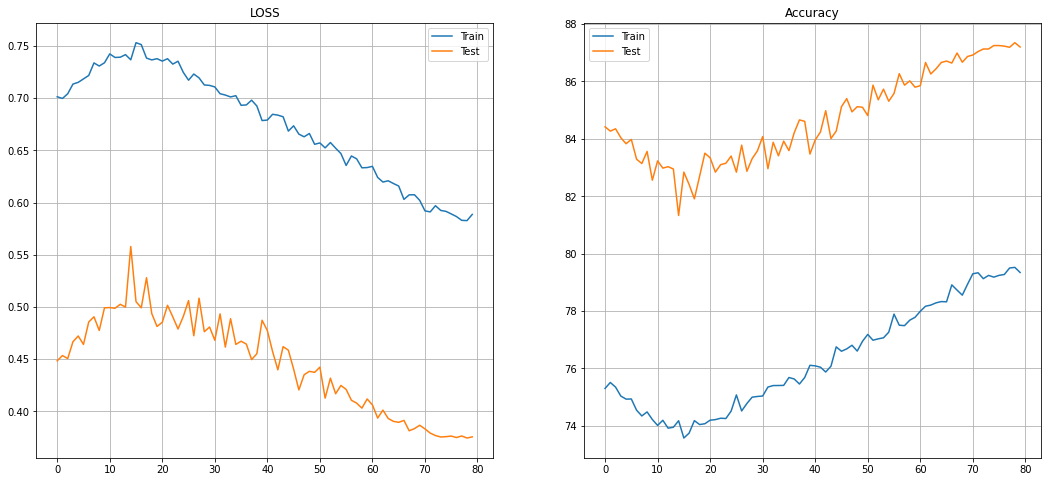

In [ ]:
print(training_output_data)
train_accuracy = training_output_data["train_Acc"]
train_loss = training_output_data["train_Loss"]

test_accuracy = training_output_data["test_Acc"]
test_loss = training_output_data["test_Loss"]

plot_axis(train_loss=train_loss, test_loss=test_loss, train_accur = train_accuracy, test_accur=test_accuracy)